In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
import assd_func as af

# import different organs

In [2]:
contour_path="9/rtstruct/rtss.dcm"
img_path="9/ct"
slices = [pydicom.read_file(img_path + '/' + s) for s in os.listdir(img_path)]
image = np.stack([s.pixel_array for s in slices], axis=-1)
contour=pydicom.read_file(contour_path)

In [3]:
#bladder
contours1=af.read_structure(contour, organ_id = 1)
#organ_id = 1 for bladder, 2 for rectum, 3 for prostate, 4 for Seminal vesicles, 6 for femoral head
label1, colors1 = af.get_mask(contours1, slices, image)

In [4]:
#rectum
contours2=af.read_structure(contour, organ_id = 2)
#organ_id = 1 for bladder, 2 for rectum, 3 for prostate, 4 for Seminal vesicles, 6 for femoral head
label2, colors2 = af.get_mask(contours2, slices, image)

In [5]:
#prostate
contours3=af.read_structure(contour, organ_id = 3)
#organ_id = 1 for bladder, 2 for rectum, 3 for prostate, 4 for Seminal vesicles, 6 for femoral head
label3, colors3 = af.get_mask(contours3, slices, image)

In [6]:
#Seminal vesicles
contours4=af.read_structure(contour, organ_id = 4)
#organ_id = 1 for bladder, 2 for rectum, 3 for prostate, 4 for Seminal vesicles, 6 for femoral head
label4, colors4 = af.get_mask(contours4, slices, image)

In [3]:
#femoral head
contours5=af.read_structure(contour, organ_id = 6)
#organ_id = 1 for bladder, 2 for rectum, 3 for prostate, 4 for Seminal vesicles, 6 for femoral head
label5, colors5 = af.get_mask(contours5, slices, image)

# Graph of HU and original contour

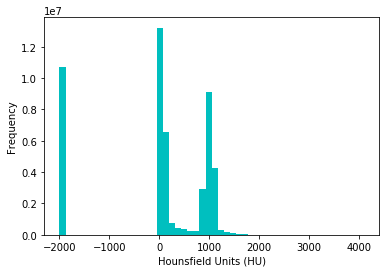

Slice Thickness: 2.500000
Pixel Spacing (row, col): (0.976562, 0.976562) 


In [8]:
plt.hist(image.flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
print("Slice Thickness: %f" % slices[0].SliceThickness)
print("Pixel Spacing (row, col): (%f, %f) " % (slices[0].PixelSpacing[0], slices[0].PixelSpacing[1]))

C:\Users\73707\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  


(-0.5, 511.5, 511.5, -0.5)

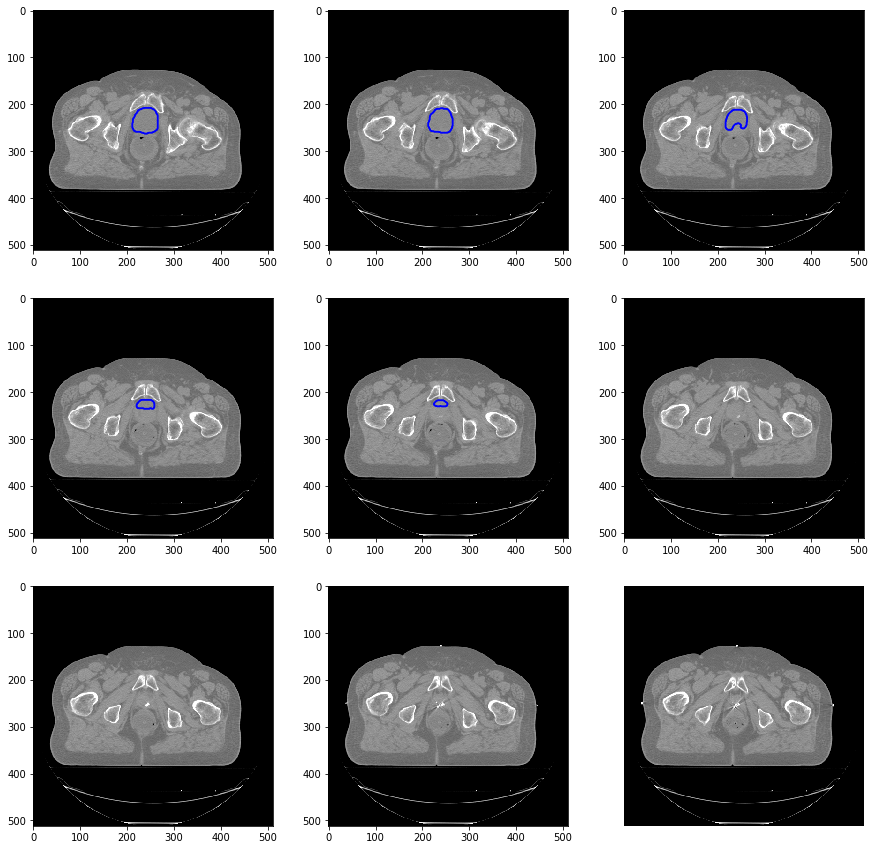

In [9]:
#bladder
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image[..., i + 15 ], cmap="gray", vmin=500, vmax=1500)
    plt.contour(label1[..., i + 15 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

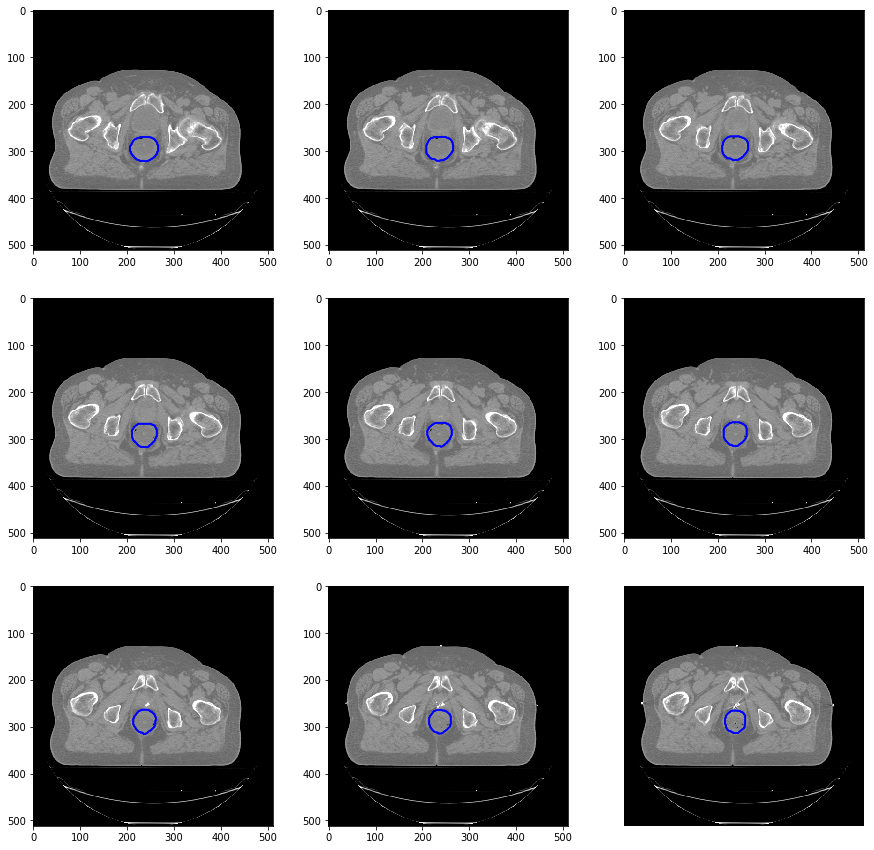

In [10]:
#rectum
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image[..., i + 15 ], cmap="gray", vmin=500, vmax=1500)
    plt.contour(label2[..., i + 15 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

C:\Users\73707\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  


(-0.5, 511.5, 511.5, -0.5)

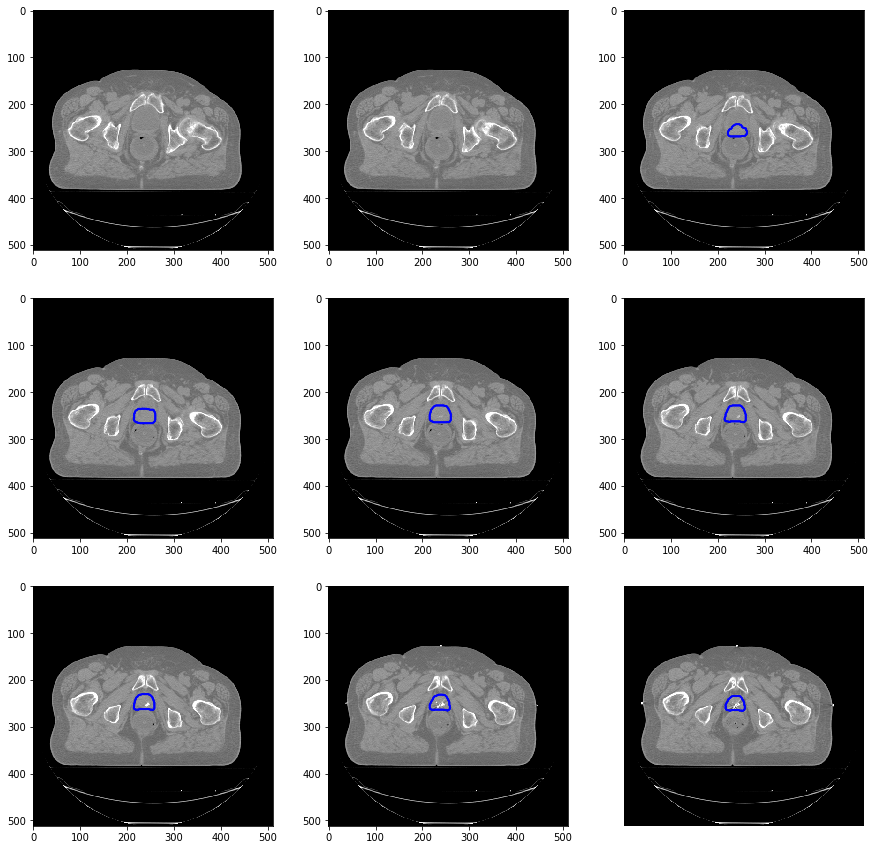

In [11]:
#prostate
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image[..., i + 15 ], cmap="gray", vmin=500, vmax=1500)
    plt.contour(label3[..., i + 15 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

C:\Users\73707\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  


(-0.5, 511.5, 511.5, -0.5)

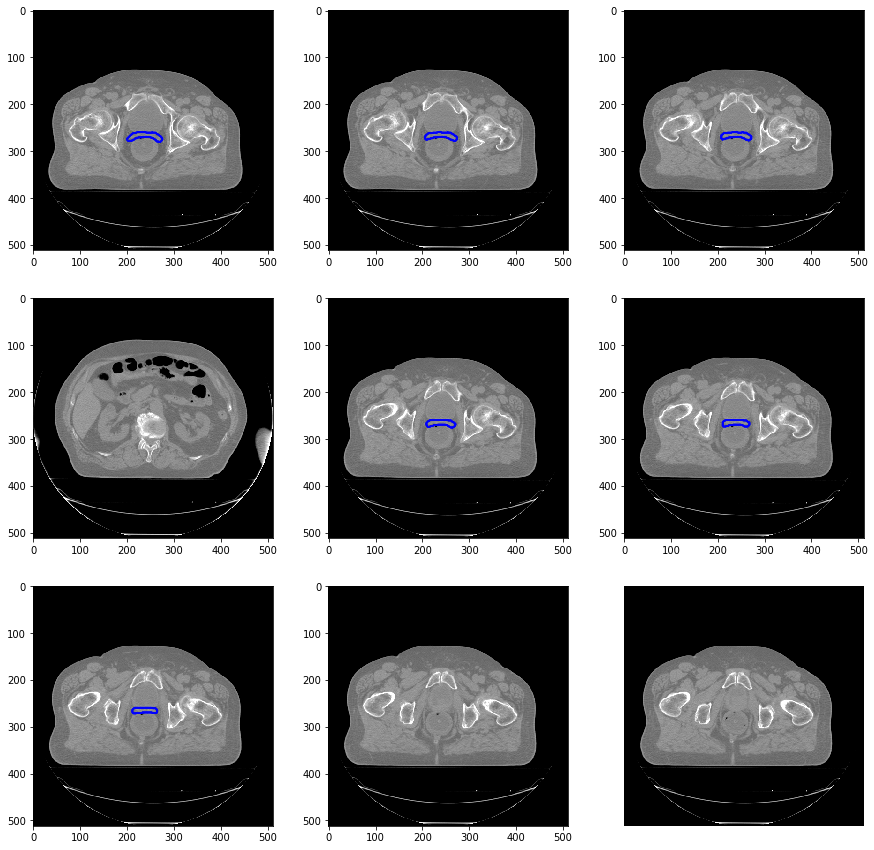

In [12]:
#Seminal vesicles
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image[..., i + 10 ], cmap="gray", vmin=500, vmax=1500)
    plt.contour(label4[..., i + 10 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

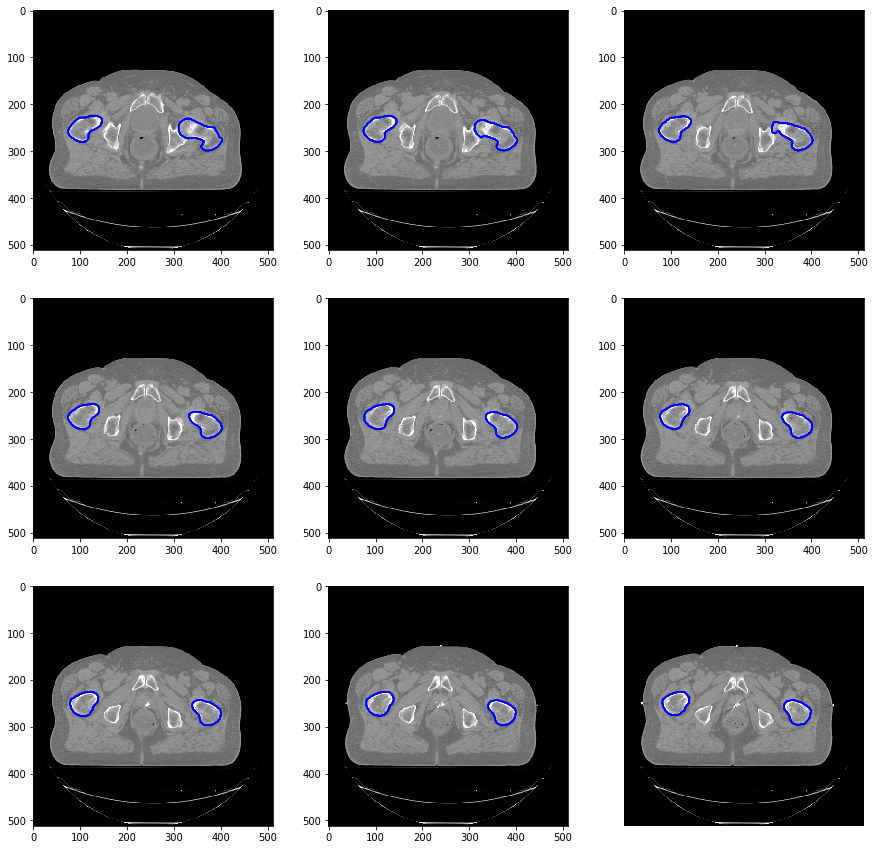

In [4]:
#femoral head
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image[..., i + 15 ], cmap="gray", vmin=500, vmax=1500)
    plt.contour(label5[..., i + 15 ], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [14]:
# choose target img for bladder
target_img1 = image[..., 18]
target_label1 = label1[..., 18]
mask1 = np.where(target_label1!=0,2,0)
surface1, interior1 = af.make_surface_contour(mask1)
surface_cord1 = np.argwhere(surface1 != 0).tolist()

In [15]:
# choose target img for rectum
target_img2 = image[..., 20]
target_label2 = label2[..., 20]
mask2 = np.where(target_label2!=0,3,0)
surface2, interior2 = af.make_surface_contour(mask2)
surface_cord2 = np.argwhere(surface2 != 0).tolist()

In [16]:
# choose target img for prostate
target_img3 = image[..., 19]
target_label3 = label3[..., 19]
mask3 = np.where(target_label3!=0,4,0)
surface3, interior3 = af.make_surface_contour(mask3)
surface_cord3 = np.argwhere(surface3 != 0).tolist()

In [17]:
# choose target img for Seminal vesicles
target_img4 = image[..., 15]
target_label4 = label4[..., 15]
mask4 = np.where(target_label4!=0,2,0)
surface4, interior4 = af.make_surface_contour(mask4)
surface_cord4 = np.argwhere(surface4 != 0).tolist()

In [5]:
# choose target img for femoral head
target_img5 = image[..., 23]
target_label5 = label5[..., 23]
np.unique(target_label5)
mask5 = np.where(target_label5!=0,7,0)
surface5, interior5 = af.make_surface_contour(mask5)
surface_cord5 = np.argwhere(surface5 != 0).tolist()

# Different iterations of the same set of paramenters on the same slice

In [6]:
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
red_patch = mpatches.Patch(color='red', label='DU contour')

a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])

(300.0, 190.0, 300.0, 190.0)

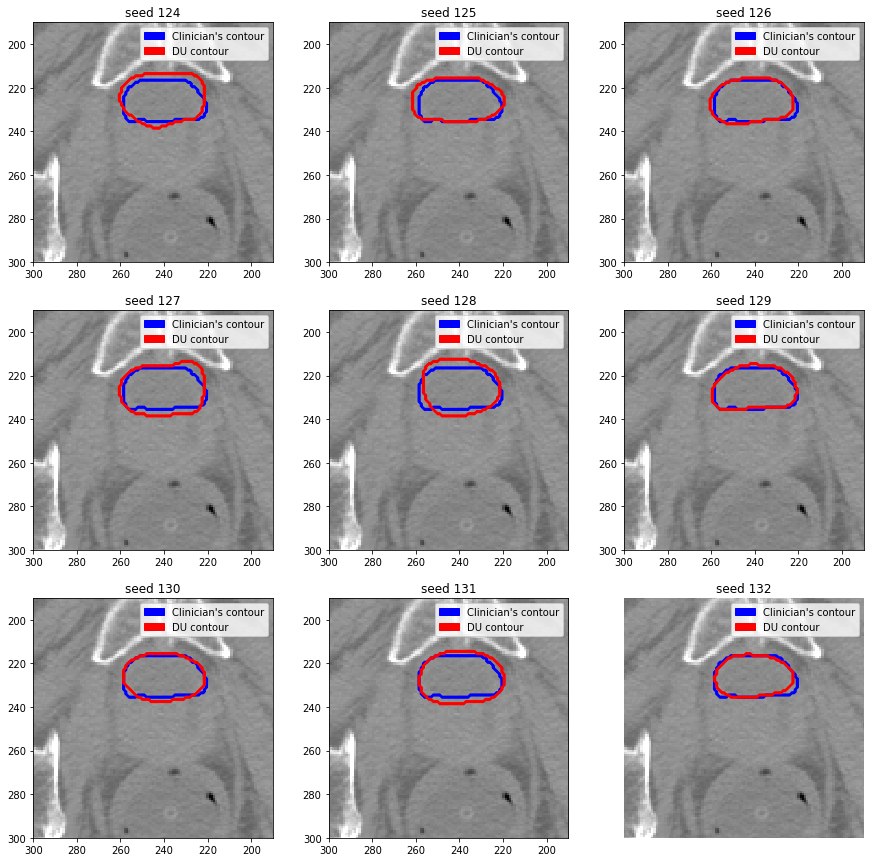

In [20]:
#bladder
plt.figure(figsize=(15, 15))

du_1_l = []
for i in range(9):
    c = 5
    SD=[c*1.7, c*2, c*2.5]
    dx1, dy1, mask1, t1, L1  = af.assd(target_img1, target_label1, voxelsize, a, SD, circles=3, seed=123+i, k=45, w=6, smooth=True, blur=True, ismax=True)
    du1 = af.plotting_assd(dx1, dy1, mask1, target_img1, quiver=False, plot=False)
    du1 = np.where(du1 < 0.5, 0, 4)
    du_1_l.append(du1)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img1, cmap="gray", vmin=500, vmax=1500)
    #plt.title("k = " + str(K[i]))
    plt.contour(mask1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title("seed " + str(i+124))
    plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

(300.0, 190.0, 350.0, 240.0)

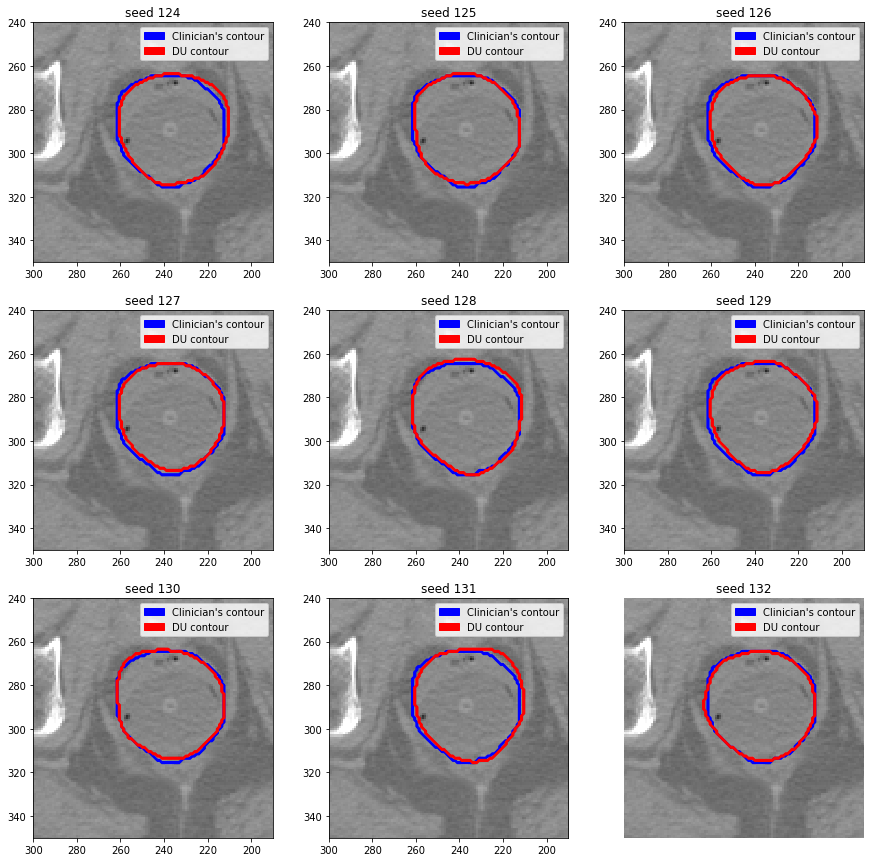

In [24]:
#rectum
plt.figure(figsize=(15, 15))

du_2_l = []
for i in range(9):
    c = 5
    SD=[c*1.7, c*2, c*2.5]
    dx2, dy2, mask2, t2, L2 = af.assd(target_img2, target_label2, voxelsize, a, SD, circles=3, seed=123+i, k=45, w=6, smooth=True, blur=True, ismax=True)
    du2 = af.plotting_assd(dx2, dy2, mask2, target_img2, quiver=False, plot=False)
    du2 = np.where(du2 < 0.5, 0, 4)
    du_2_l.append(du2)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img2, cmap="gray", vmin=500, vmax=1500)
    #plt.title("k = " + str(K[i]))
    plt.contour(mask2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.contour(du2, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(350, 240)
    plt.title("seed " + str(i+124))
    plt.legend(handles=[blue_patch, red_patch])
plt.axis('off')

(300.0, 190.0, 300.0, 190.0)

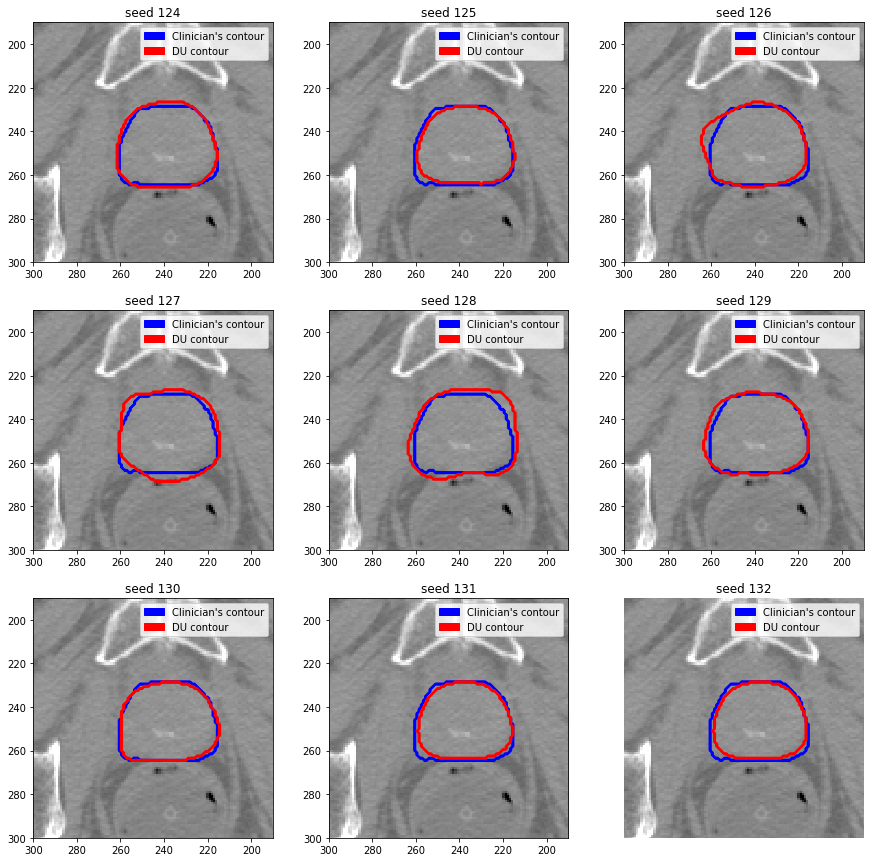

In [25]:
#prostate
plt.figure(figsize=(15, 15))

du_3_l = []
for i in range(9):
    c = 5
    SD=[c*1.7, c*2, c*2.5]
    dx3, dy3, mask3, t3, L3 = af.assd(target_img3, target_label3, voxelsize, a, SD, circles=3, seed=123+i, k=45, w=6, smooth=True, blur=True, ismax=True)
    du3 = af.plotting_assd(dx3, dy3, mask3, target_img3, quiver=False, plot=False)
    du3 = np.where(du3 < 0.5, 0, 4)
    du_3_l.append(du3)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img3, cmap="gray", vmin=500, vmax=1500)
    #plt.title("k = " + str(K[i]))
    plt.contour(mask3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.contour(du3, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title("seed " + str(i+124))
    plt.legend(handles=[ blue_patch, red_patch])
plt.axis('off')

(300.0, 190.0, 300.0, 190.0)

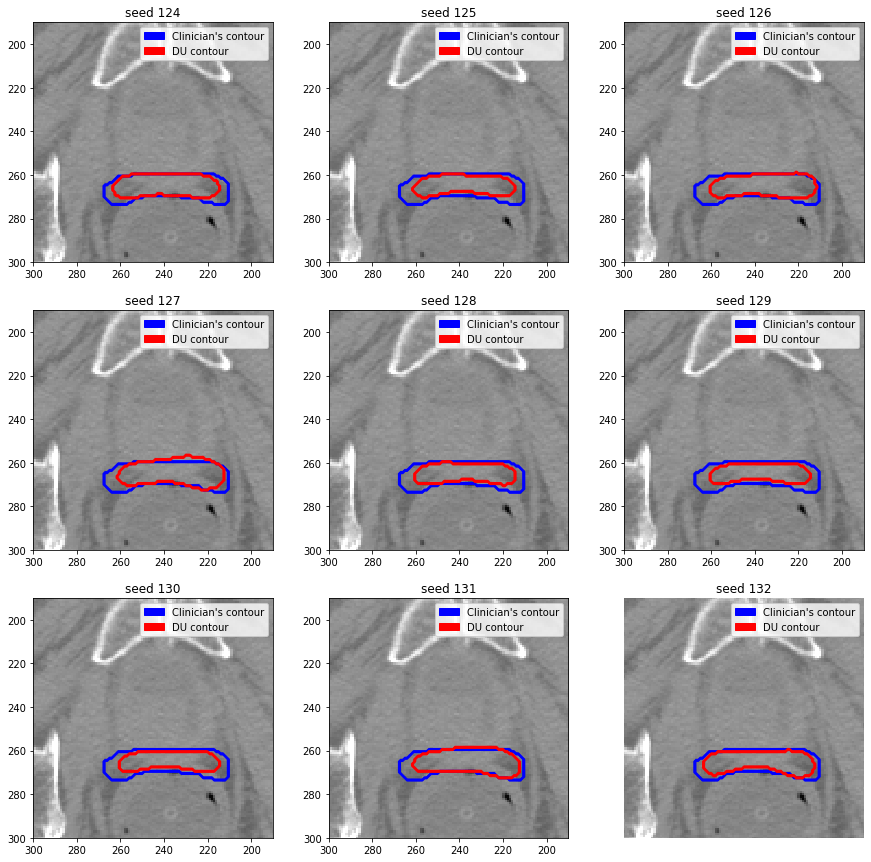

In [26]:
#Seminal vesicles
plt.figure(figsize=(15, 15))

du_4_l = []
for i in range(9):
    c = 5
    SD=[c*1.7, c*2, c*2.5]
    dx4, dy4, mask4, t4, L4  = af.assd(target_img4, target_label4, voxelsize, a, SD, circles=3, seed=123+i, k=45, w=6, smooth=True, blur=True, ismax=True)
    du4 = af.plotting_assd(dx4, dy4, mask4, target_img4, quiver=False, plot=False)
    du4 = np.where(du4 < 0.5, 0, 4)
    du_4_l.append(du4)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img1, cmap="gray", vmin=500, vmax=1500)
    #plt.title("k = " + str(K[i]))
    plt.contour(mask4, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.contour(du4, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 190)
    plt.ylim(300, 190)
    plt.title("seed " + str(i+124))
    plt.legend(handles=[ blue_patch, red_patch])
plt.axis('off')

(420.0, 50.0, 320.0, 200.0)

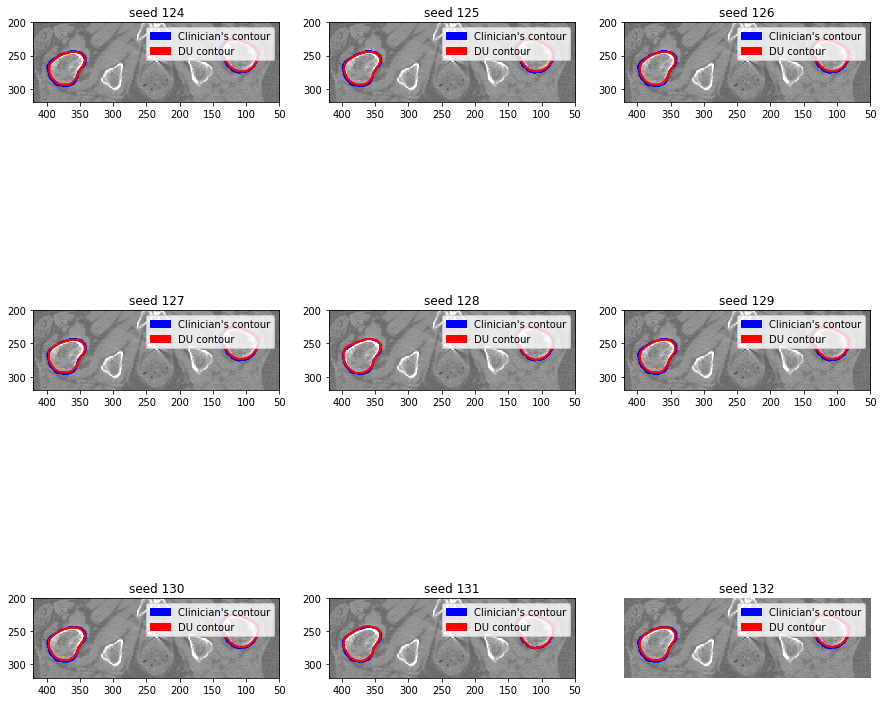

In [9]:
#femoral head
plt.figure(figsize=(15, 15))

du_5_l = []
for i in range(9):
    c = 5
    SD=[c*1.7, c*2, c*2.5]
    dx5, dy5, mask5, t5, L5  = af.assd(target_img5, target_label5, voxelsize, a, SD, circles=3, seed=123+i, k=45, w=6, smooth=True, blur=True, ismax=True)
    du5 = af.plotting_assd(dx5, dy5, mask5, target_img5, quiver=False, plot=False)
    du5 = np.where(du5 < 0.5, 0, 4)
    du_5_l.append(du5)
    plt.subplot(3, 3, i + 1)
    plt.imshow(target_img5, cmap="gray", vmin=500, vmax=1500)
    #plt.title("k = " + str(K[i]))
    plt.contour(mask5, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
    plt.contour(du5, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(420, 50)
    plt.ylim(400, 100)
    plt.title("seed " + str(i+124))
    plt.legend(handles=[ blue_patch, red_patch])
plt.axis('off')